https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

from matplotlib.colors import ListedColormap, BoundaryNorm


In [10]:
# Read the shapefile
df = pd.read_csv("New_York_City_s_Flood_Vulnerability_Index_20240930.csv")

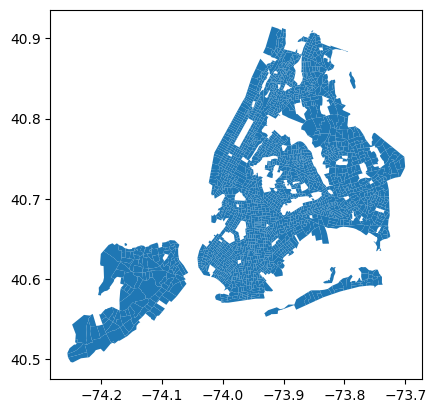

In [4]:
# Read the shapefile
gdf = gpd.read_file("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp")

# Plot the shapefile
gdf.plot()

# Show the plot
plt.show()

In [6]:
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5    NaN    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5    NaN    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [12]:
gdf['ss_cur'] = gdf['ss_cur'].fillna(0)
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5      0    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [20]:
# Define your custom color list (6 colors)
colors = ['#ffffff', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']  # Customize these colors

# Create a custom colormap
cmap = ListedColormap(colors)

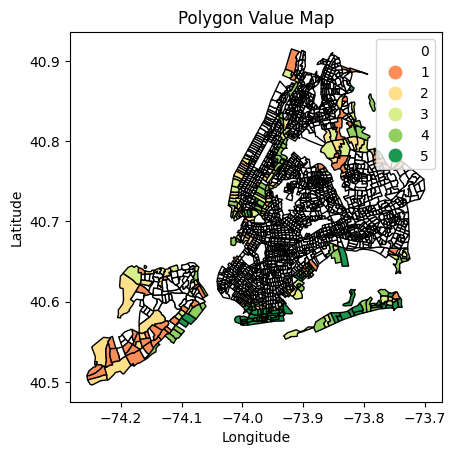

In [21]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf.plot(column='ss_cur', legend=True, cmap=cmap, edgecolor='black')

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Let's get the subway MTA data

In [30]:
csvFile = pd.read_csv('/Users/bricenfisher/Documents/GitHub/NYC-MTA-Project/MTA_Subway_Entrances_and_Exits__2024_20240930.csv')
print(csvFile.head(1))

  Division    Line Borough                 Stop Name  Complex ID  \
0      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   

   Constituent Station Name  Station ID GTFS Stop ID     Daytime Routes  \
0  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   

  Entrance Type Entry Allowed Exit Allowed  Entrance Latitude  \
0         Stair           YES          YES          40.683905   

   Entrance Longitude         entrance_georeference  
0          -73.978879  POINT (-73.978879 40.683905)  


In [40]:

points_gdf = gpd.GeoDataFrame(csvFile,geometry='entrance_georeference')
print(points_gdf)


TypeError: Input must be valid geometry objects: POINT (-73.978879 40.683905)

In [39]:
points_within_boundaries = gpd.sjoin(points_gdf, gdf, how='inner', op='within')


/Users/bricenfisher/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

In [ ]:
points_count = points_within_boundaries.shape[0]

print(f"Number of points within boundaries: {points_count}")